# Introduction
We used the a Australia dataset that predicts rain for the current day and the following day from 2008-2017. We also used a Seattle dataset that predicts rain for the following day from 1948-2017. We cleaned this data and also spliced it to also be from 2008-2017 to reduce the number of rows. We were trying to classify the prediction of rain on any given day/month. We classified with Decision Tree, Random Forest Tree, Random, and Naive Bayes. We found Naive Bayes to be the most accurate of around 80 percent. We found the Decision Tree to be close around 75 percent average, so we decided to use Decision Tree as the classifier for our Heroku app because we were afraid our Naive Bayes was producing overfit estimations (therfore not as valid).

# Data Analysis
## Dataset Info
The Australia datasets (Melbourne and Sydney) contained 23 initial attributes which were paired down to 15 attributes: Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,RainToday,RainTomorrow. We were predicting for the RainTomorrow attribute. The Melbourne dataset contained 1897 instances while the Sydney dataset contained 1690 instances. The Seattle dataset contained 5 attributes: DATE,PRCP,TMAX,TMIN,RAIN. We were predicting for the RAIN attribute. The Seattle dataset contained 3301 instances.

# Dataset Summary and Data Visualizations

Melbourne EDA: The first bar chart is to show the distribution of days rained vs not rained throughout a dataset. We can see that there are much more days not rained than rained here. The second bar chart is there to show us how much it rains each month throughout the year. We can see that there are less rainy days throughout the months of Jan-Apr. The pie chart is there to show us a distribution of percentages of rainy days throughout the entire dataset. We can see it rains almost the same each month except for Jan-Apr which indicates a climate that is for the most part pretty static. This makes sense because Australia does not have drastic seasons like Seattle.

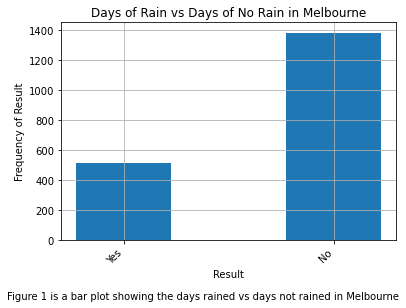

range: 1897 1897


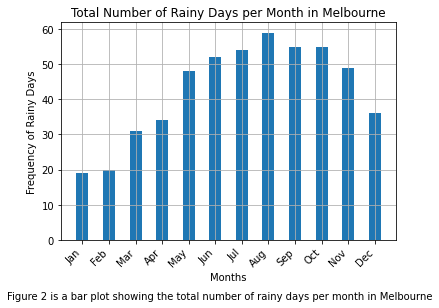

<Figure size 432x288 with 0 Axes>

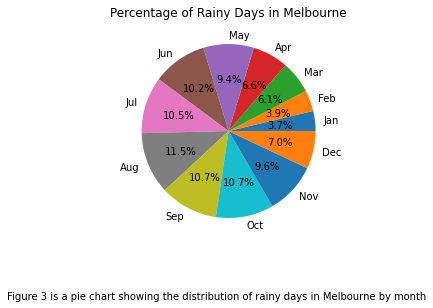

In [2]:
import matplotlib.pyplot as plt
import mysklearn.myutils as myutils
import mysklearn.plot_utils as plot_utils
from mysklearn.mypytable import MyPyTable
import os
import copy


data_name = os.path.join("input_data", "MelbourneparsedData.csv")
table = MyPyTable().load_from_file(data_name)
table_copy = copy.deepcopy(table)
table_copy.remove_rows_with_missing_values()
MyPyTable.save_to_file(table_copy, data_name)

column = table_copy.get_column("RainToday")
length = len(column)
yes_count = 0
for col in column:
    if col == "Yes":
        yes_count = yes_count + 1
no_count = length - yes_count

fig = plt.figure()
plt.title("Days of Rain vs Days of No Rain in Melbourne")
plt.xlabel("Result")
plt.ylabel("Frequency of Result")
fig.text(0, -.08, "Figure 1 is a bar plot showing the days rained vs days not rained in Melbourne")
plot_utils.bar_graph(['Yes', 'No'], [yes_count, no_count])
plt.show()

###parse rainToday's that are yes
###month values = month name (12 of them), month_counts = (counts of rainToday that are yes for each month)

### table with only yes' and no NA's
months, rain_col = myutils.get_aus_frequencies(table_copy, "RainToday")

## Platforms bar graph is being shown
fig = plt.figure()
plt.title("Total Number of Rainy Days per Month in Melbourne")
plt.xlabel("Months")
plt.ylabel("Frequency of Rainy Days")
fig.text(0, -.08, "Figure 2 is a bar plot showing the total number of rainy days per month in Melbourne")
plot_utils.bar_graph(months, rain_col)
plt.figure()
plt.show()

fig = plt.figure()
plt.title("Percentage of Rainy Days in Melbourne")
fig.text(0, -.08, "Figure 3 is a pie chart showing the distribution of rainy days in Melbourne by month")
plot_utils.pie_chart(months, rain_col)
plt.show()

Sydney EDA: The first bar chart is to show the distribution of days rained vs not rained throughout a dataset. We can see that there are much more days not rained than rained here. The second bar chart is there to show us how much it rains each month throughout the year. We can see that it rains pretty evenly throughout the year. The pie chart is there to show us a distribution of percentages of rainy days throughout the entire dataset. We can see it rains almost the same each month which indicates a climate that is for the most part pretty static. This makes sense because Australia does not have drastic seasons like Seattle.

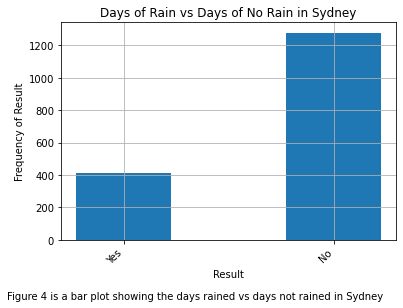

range: 1690 1690


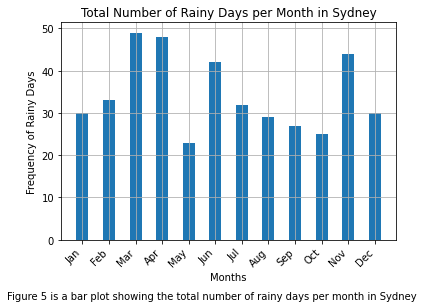

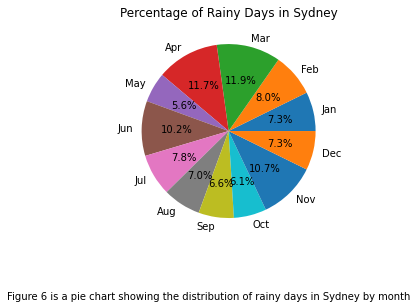

In [4]:
data_name = os.path.join("input_data", "SydneyparsedData.csv")
table = MyPyTable().load_from_file(data_name)
table_copy = copy.deepcopy(table)
table_copy.remove_rows_with_missing_values()
MyPyTable.save_to_file(table_copy, data_name)

column = table_copy.get_column("RainToday")
length = len(column)
yes_count = 0
for col in column:
    if col == "Yes":
        yes_count = yes_count + 1
no_count = length - yes_count

fig = plt.figure()
plt.title("Days of Rain vs Days of No Rain in Sydney")
plt.xlabel("Result")
plt.ylabel("Frequency of Result")
fig.text(0, -.08, "Figure 4 is a bar plot showing the days rained vs days not rained in Sydney")
plot_utils.bar_graph(['Yes', 'No'], [yes_count, no_count])
plt.show()

###parse rainToday's that are yes
###month values = month name (12 of them), month_counts = (counts of rainToday that are yes for each month)

### table with only yes' and no NA's
months, rain_col2 = myutils.get_aus_frequencies(table_copy, "RainToday")

## Platforms bar graph is being shown
fig = plt.figure()
plt.title("Total Number of Rainy Days per Month in Sydney")
plt.xlabel("Months")
plt.ylabel("Frequency of Rainy Days")
fig.text(0, -.08, "Figure 5 is a bar plot showing the total number of rainy days per month in Sydney")
plot_utils.bar_graph(months, rain_col2)
plt.show()

fig = plt.figure()
plt.title("Percentage of Rainy Days in Sydney")
fig.text(0, -.08, "Figure 6 is a pie chart showing the distribution of rainy days in Sydney by month")
plot_utils.pie_chart(months, rain_col2)
plt.show()

Seattle EDA: The first bar chart is to show the distribution of days rained vs not rained throughout a dataset. We can see that there are much more days rained than not rained here. The second bar chart is there to show us how much it rains each month throughout the year. We can see that it rains a lot throughout the year except for months June through September. The pie chart is there to show us a distribution of percentages of rainy days throughout the entire dataset. We can see it rains a lot except for the summer months. This makes sense because Seattle has more extreme seasons than Australia.

Plot: This was meant to show just how all three datasets stacked on eachother when it comes to rainy days throughout the year. We can see that Seattle blows out Australia for days rained and this is not a suprise. It also shows that even at it's low point of rainy days in the summer it is close to Sydney's normal median of rain for that month of July.

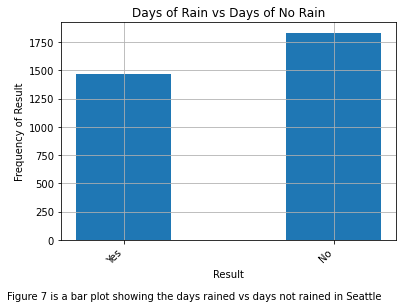

range: 3301 3301


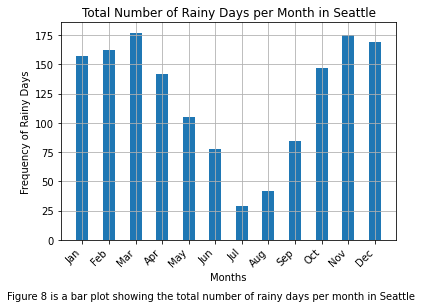

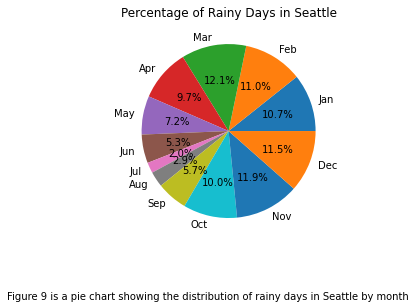

<Figure size 432x288 with 0 Axes>

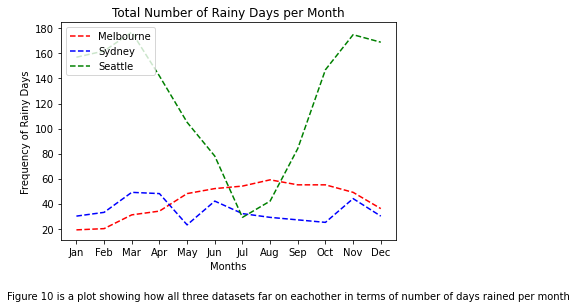

In [5]:
## Data cleaning is executing...

data_name = os.path.join("input_data", "seattleWeather_2008-2017.csv")
table = MyPyTable().load_from_file(data_name)
table_copy = copy.deepcopy(table)
table_copy.remove_rows_with_missing_values()
MyPyTable.save_to_file(table_copy, data_name)

column = table_copy.get_column("RAIN")
length = len(column)
yes_count = 0
for col in column:
    if col == "TRUE":
        yes_count = yes_count + 1
no_count = length - yes_count

fig = plt.figure()
plt.title("Days of Rain vs Days of No Rain in Seattle")
plt.xlabel("Result")
plt.ylabel("Frequency of Result")
fig.text(0, -.08, "Figure 7 is a bar plot showing the days rained vs days not rained in Seattle")
plot_utils.bar_graph(['Yes', 'No'], [yes_count, no_count])
plt.show()

###parse rainToday's that are yes
###month values = month name (12 of them), month_counts = (counts of rainToday that are yes for each month)

### table with only yes' and no NA's
months, rain_col3 = myutils.get_sea_frequencies(table_copy, "RAIN")

## Platforms bar graph is being shown
fig = plt.figure()
plt.title("Total Number of Rainy Days per Month in Seattle")
plt.xlabel("Months")
plt.ylabel("Frequency of Rainy Days")
fig.text(0, -.08, "Figure 8 is a bar plot showing the total number of rainy days per month in Seattle")
plot_utils.bar_graph(months, rain_col3)
plt.show()

fig = plt.figure()
plt.title("Percentage of Rainy Days in Seattle")
fig.text(0, -.08, "Figure 9 is a pie chart showing the distribution of rainy days in Seattle by month")
plot_utils.pie_chart(months, rain_col3)
plt.show()

plt.figure()
fig = plt.figure()
plt.title("Total Number of Rainy Days per Month")
plt.xlabel("Months")
plt.ylabel("Frequency of Rainy Days")
fig.text(0, -.08, "Figure 10 is a plot showing how all three datasets far on eachother in terms of number of days rained per month")
plt.plot(months, rain_col, 'r--', label='Melbourne')
plt.plot(months, rain_col2, 'b--', label='Sydney')
plt.plot(months, rain_col3, 'g--', label='Seattle')
plt.legend(loc="upper left")
plt.show()

# Classification results

We knew we wanted to use 3 classifiers on each of these datasets. Since we have a boolean class, we wanetd to be beating the random 50-50 chance so we included the Random Classifier. We also had good results with Naive Bayes and Decision Trees during the year so we included those as well. Finally, we wrote a new classifier called MyRandomForestClassifier which uses a new type of learning called ensemble learning. 

|ACCURACY|MyRandomClassifier|MyNaiveBayesClassifier|MyDecisionTreeClassifier|MyRandomForestClassifier|
|----|----|----|----|----|
|Seattle|0.52|0.69|0.62|0.65|
|Melbourne|0.63|0.82|0.71|0.65|
|Sydney|0.64|0.84|0.73|0.59|


The design was test driven for all of the classifiers based on desk checks performed previously in the semester. The random forest algorithm is very hard to test because of its randomness. Each of the classifiers was evaluated based on its accuracy in predicting class labels for the given test set after training on a large subset of the intial data. We used 3 different comparisons; `train_test_split`, `random_stratified_split`, and `stratified_kfold_cross_validation` for our data. The first is a simple holdout method, the second is a method I wrote to randomly, but stratifically, assign instances to either training or testing sets, and the final was our stratified k-fold variation. All of these gave very similar results but we took the average of each to get the table above. This gave us a wide idea of how our classifier performed as we attempted to remove as much deivation due to the random nature as possible. We used accuracy because we had a boolean class which allowed us to not worry as much about the distribution and instead focus on the randomness explained above.

## Analysis 
Technically, the best was Naive Bayes but it takes a very long time for the alogrithm to run each time, so Eric and I decided that a pickled decision tree would be our "best" classifier. Interestingly, the Seattle dataset consistently had the worst predictive accuracy of all the datasets. Eric and I hypothesize that this is due to the lower number of available attributes to use.
 
To see our app in action:
1. Visit https://rain-app-eric-caleb.herokuapp.com 
1. Input endpoints in result? 
    + "DATE" = att0 = 'year-month' 
    + "TMAX" = att1 = 'float' (high temp in F)
    + "TMIN" = att2 = 'float' (low temp in F) 
    + Example: https://rain-app-eric-caleb.herokuapp.com/predict?att0=13-Aug&att1=89.0&att2=54.0


# Conclusion

## Dataset
We pared down the Australia dataset into a Sydney and a Melbourne dataset which had 15 attributes each and around 3000 instances. The Seattle dataset we cut down from 79 years of data to 11 years. The biggest challenges were making sure each of us were working with the most up to date data and then if we needed to trim, modifying the code we had actually written already.

## Classification
We used a Random, Naive Bayes, Decision Tree, and Random Forest Classifier on these three datasets. Ultimately we deployed the Decision Tree to Heroku for its speed and its accuracy combined. 

===========================================
MyDecisionTreeClassifier Results
===========================================

Melbourne accuracy = 0.71 & error rate = 0.29 \
Sydney accuracy = 0.73 & error rate = 0.27 \
Seattle accuracy = 0.62 & error rate = 0.38 


## Ideas for Improvement
1. Possibly specify by the month so we can have more accurate and applicable results.
1. UI implementation so we can choose which of the 3 locations we want to predict for.
1. Collect more data for Seattle and be more intentional about selection.

## Sources and references
+ [Australia Rain](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)
+ [Seattle Rain](https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017/metadata)
+ [Go Follow Gina!](https://www.youtube.com/playlist?list=PL7uPCUbavAWf66__MqJfMvFgDqN7ghLSo)
+ [StackOverflow](https://stackoverflow.com)


